In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [3]:
class_names = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
test_images.shape

(10000, 28, 28)

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Przetwarzanie wstępne obrazów

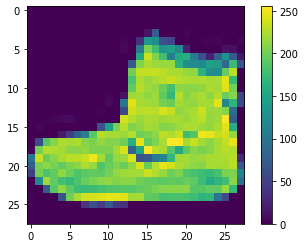

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
train_images = train_images/255.0
test_images = test_images/255.0

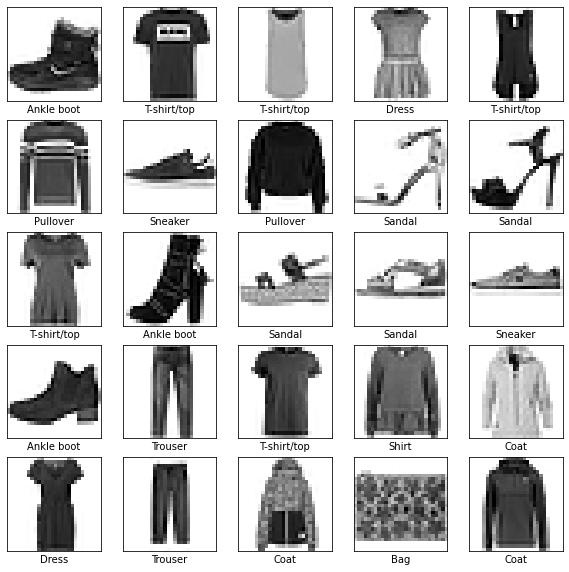

In [8]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i],cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [9]:
#budowa i konfiguracja modelu sieci neuronowej

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(128,activation='relu'),
    tf.keras.layers.Dense(10)
])

In [10]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [11]:
model.fit(train_images,train_labels,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 3.1879 - accuracy: 0.6936
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7140 - accuracy: 0.7543
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6081 - accuracy: 0.7879
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5614 - accuracy: 0.8079
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5230 - accuracy: 0.8242
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5053 - accuracy: 0.8308
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4982 - accuracy: 0.8337
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4893 - accuracy: 0.8383
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4820 - accuracy: 0.8405
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.477

In [12]:
#ocena dokładności
test_loss, test_acc = model.evaluate(test_images,test_labels,verbose=2)
print(f"\nDokładność danych testowych: {test_acc}")

313/313 - 1s - loss: 0.5822 - accuracy: 0.8324 - 593ms/epoch - 2ms/step

Dokładność danych testowych: 0.8324000239372253


In [13]:
#Prognozowanie

probability_model = tf.keras.Sequential([model,tf.keras.layers.Softmax()])

In [14]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 1s 1ms/step


In [15]:
predictions[0]

array([7.3788218e-21, 7.5068887e-23, 0.0000000e+00, 4.2801697e-15,
 1.4857708e-36, 1.0891365e-02, 0.0000000e+00, 1.0182935e-02,
 1.7740260e-15, 9.7892570e-01], dtype=float32)

In [16]:
np.argmax(predictions[0])

9

In [17]:
def plot_image(i,predictions_array,true_label,img):
    true_label,img = true_label[i], img[i]
    plt.grid(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(img,cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array)
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                         100*np.max(predictions_array),
                                         class_names[true_label]),
               color=color)
    
def plot_value_array(i,predictions_array,true_label):
    true_label= true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10),predictions_array,color='#777777')
    plt.ylim([0,1])
    predicted_label = np.argmax(predictions_array)
    thisplot[predicted_label].set_color('red')
    thisplot[true_label].set_color('blue')

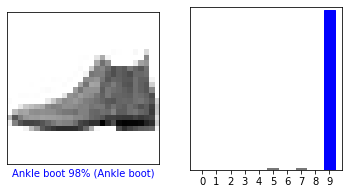

In [18]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)
plt.show()

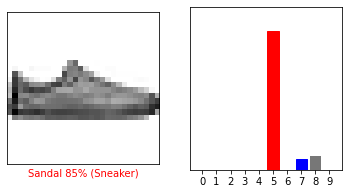

In [19]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i,predictions[i],test_labels,test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],test_labels)
plt.show()

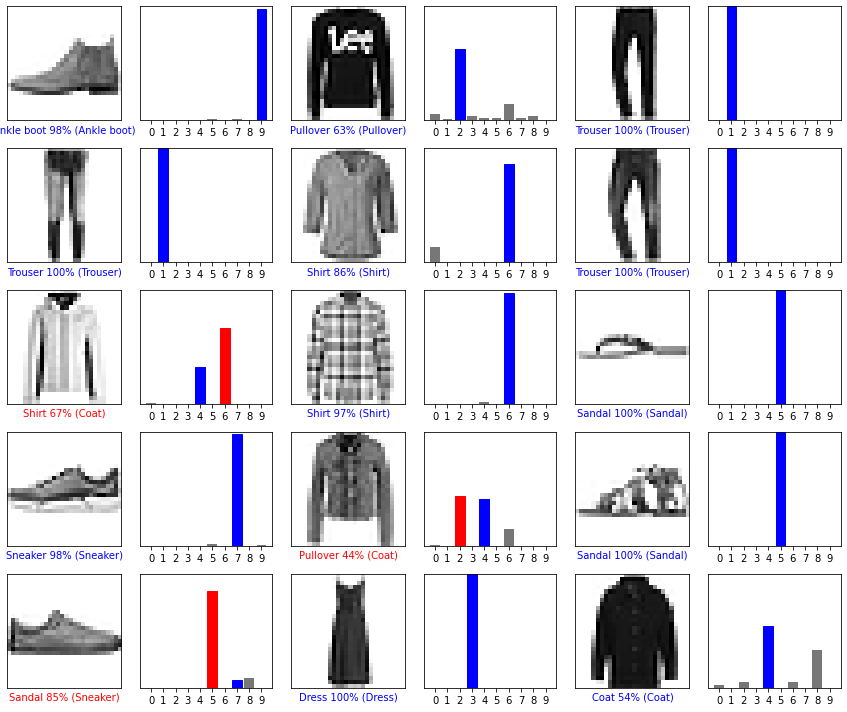

In [20]:
num_rows = 5
num_cols = 3

num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols,2*num_rows))
for i in range(num_images):
    plt.subplot(num_rows,2*num_cols,2*i+1)
    plot_image(i,predictions[i],test_labels,test_images)
    plt.subplot(num_rows,2*num_cols,2*i+2)
    plot_value_array(i,predictions[i],test_labels)
plt.tight_layout()
plt.show()

In [21]:
#użycie wyszkolonego modelu

img = test_images[1]
print(img.shape)

(28, 28)


In [22]:
img = (np.expand_dims(img,0))
print(img.shape)

(1, 28, 28)


In [23]:
predictions_single = probability_model.predict(img)
print(predictions_single)

1/1 [==============================] - 0s 22ms/step
[[0.05797458 0.01050425 0.62955916 0.04247063 0.02431457 0.02460671
  0.145024   0.01853073 0.04185174 0.00516359]]


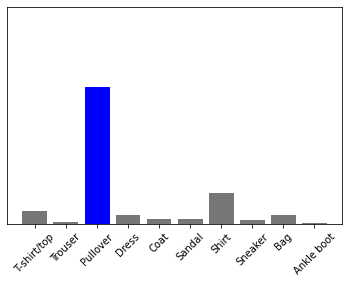

In [24]:
plot_value_array(1,predictions_single[0],test_labels)
_ = plt.xticks(range(10),class_names,rotation=45)
plt.show()